# Исследование надежности заемщиков.

Заказчик — кредитный отдел банка. Заказчик просит разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


Данные, которые содержатся в датасете:
```
children — количество детей в семье
days_employed — общий трудовой стаж в днях
dob_years — возраст клиента в годах
education — уровень образования клиента
education_id — идентификатор уровня образования
family_status — семейное положение
family_status_id — идентификатор семейного положения
gender — пол клиента
income_type — тип занятости
debt — имел ли задолженность по возврату кредитов
total_income — ежемесячный доход
purpose — цель получения кредита
```

Видно, что здесь есть также другие параметры / характеристики клиента - можно посмотреть, как они влияют на платежеспособность.


### Содержание 
<a id="back"></a>

- #### [Шаг 1. Обзор данных](#step_1)
- #### [Шаг 2. Предобработка данных](#step_2)
- #### [Шаг 3. Ответы на вопросы.](#step_3_1)
- #### [Общий вывод](#step_4)
- ##### [Шаг 2.1 Заполнение пропусков](#step_2_1)
- ##### [Шаг 2.2 Проверка данных на аномалии и исправления](#step_2_2)
- ##### [Шаг 2.3. Изменение типов данных](#step_2_3)
- ##### [Шаг 2.4. Удаление дубликатов](#step_2_4)
- ##### [Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма](#step_2_5)
- ##### [Шаг 2.6. Категоризация дохода](#step_2_6)
- ##### [Шаг 2.7. Категоризация целей кредита](#step_2_7)
- #### [Ответы на исследовательские вопросы](#step_3_1)
- #### [Выводы](#step_4)

## Шаг 1. Обзор данных

 <a id="step_1"></a>

[К оглавлению.](#back)

Датасет для колаба сохранён здесь:
https://drive.google.com/file/d/16jAh_tQKKdxa7SjQ29lNVaQ8rJI66[...]/view?usp=sharing

id для скачивания: 16jAh_tQKKdxa7SjQ29lNVaQ8rJI66[...]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Импортируем датасет:

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np

from pandas.testing import assert_frame_equal


# ! gdown 16jAh_tQKKdxa7SjQ29lNVaQ8rJI66[...]

Посмотрим общую информацию о датасете:

In [66]:
# df = pd.read_csv('/content/data.csv')

df = pd.read_csv('/datasets/data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


Из того, что здесь есть видно, что:
* пропущены значения в переменной `days_employed`, а также `total_income`. Обратим внимание, что количество заполненных (и незаполненных ячеек одинаковое для обеих ячеек). Возможно, это как-то связано. Нужно будет проверить.

Посмотрим более подробно, какие значения есть в таблице.

In [67]:
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Также из этого обзора видно, что некоторые значения `days_employed` являются отрицательными, что говорит о обишках, которые нужно будет потом исправить.

#### 1.1 Наличие пропусков в таблице

Посмотрим, есть ли где-то пропуски в датафрейме:

Посчитаем для столбца `days_employed`:

In [68]:
display(df[df['days_employed'].isna()].count())

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

Аналогично посчитаем для столбца `total_income`:

In [69]:
display(df[df['total_income'].isna()].count())

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

Похоже, что данные в `total_income` отсутствуют там же, где и в столбце `days_emploed`.

Проверим для начала, действительно ли эти списки совпадают?

Создадим датафрейм `df_nan_total_income`, содержащий только пропуски в `total_income`

In [70]:
df_nan_total_income = df[df['total_income'].isna()]

Создадим датафрейм `df_nan_days_employed` , содержащий только пропуски в `days_employed`

In [71]:
df_nan_days_employed = df[df['days_employed'].isna()]

И сравним их: 

In [72]:
try:
  assert_frame_equal(df_nan_total_income, df_nan_days_employed)
  print('списки идентичны')
except:
  print('списки НЕидентичны')

#print(df_nan_total_income != df_nan_days_employed)

списки идентичны


Значит, это пропуски встречаются в одних и тех же строчках.

Значит, можно в будущем использвать любой из этих списков для анализа

#### 1.2 Какая доля у пропущенных значений, и можно ли их просто выкинуть?

Посчитаем, какова доля пропусков делённое к общему количеству строчек. 

In [73]:
print('{:.01%}'.format(df_nan_total_income['children'].count() / df.shape[0]))

10.1%


In [74]:
display(pd.DataFrame(round((
    df.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
days_employed,10.10
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00


~10% - это много, пренебечь и сбросить эти строчк нельзя - они могут существенно влиять на результат.

Поэтому нужно далее посмотреть, в чём причина пропусков?

#### 1.3 Причины пропусков?

С учётом того, что пропуски встречаются в обоих колонках сразу, то это может быть программная ошибка - какая-то функция одновременно записывает (точнее, НЕ записывает) и `days_employed`, и `total_income`.

Если учесть, что согласно описанию:
* `days_employed` — общий трудовой стаж в днях
* `total_income` — ежемесячный доход

То понятно, что если у человека нет трудового стажа, то и рассчитать его ежемесячный доход (который может быть равен доходу за большой преиод времени, например, год, разделённому на стаж) - невозможно, т.к. это получается деление на ноль. 

Это _гипотеза_, чтобы её проверить, необходимо будет сопоставить несколько показателей:
* сколько человек имеют не заполненные поля со стажем `days_employed` и с ежемесячным доходом и `total_income` + возрастом `dob_years`?
* сколько человек имеют не заполненные поля со стажем `days_employed` и с ежемесячным доходом и `total_income` + возрастом `income_type`?
* сколько человек имеют не заполненные поля со стажем `days_employed` и с ежемесячным доходом и `total_income` + уровнем образования `education`?

От этого будет зависеть, каким образом мы будем заполнять эти пропуски. Если трудового стажа вообще нет и поэтому доходов тоже нет, потому что человек не работал, тогда нужно будет оба поля заполнить нулями. Если будут другие причины - тогда нужно будет думать, как ещё можно заполнить эти пропуски?

Проверим это и посмолтрим на список пропусками:

In [75]:
df_nan_total_income

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости



Таким образом наша гипотеза не подтвердилась - все, у кого есть пропуски в обеих таблицах, имеют: 
* недетский возраст (`dob_years` > 20) и 
* тип занятости `income_type`, который свидетельствует о том, что человек всё же работал, 
* а также законченное образование `education`, в т.ч. высшее

поэтому NaN - это ошибка, которую нужно заполнить НЕ нулями.



#### 1.4 Почему пропуски заполнять лучше медианным значением?

медианное значение является предпочтительным, потому что:
* в оно вносит минимальные искажения в выборку для дальнейшего анализа по сравнению с какм-то одним значенеим, особенно если оно сильно больше или меньше крайних значений диапазона (нарпимер, нулём).
* также медиана вносит меньше искажений, чем значение среднего арифсетического, т.к. оно также сильно подвержено влиянию экстермально больших или маленьких значений. 


## Шаг 2. Предобработка данных.
 <a id="step_2"></a>
 
### Шаг 2.1 Заполнение пропусков

<a id="step_2_1"></a>

[К оглавлению.](#back)

Заполнять пропуски будем медианными значениями, но перед этим нужно проверить и исправить аномальные значения, иначе медиана будет рассчитана неверно.

#### Заполнение пропусков для для столбца `days_employed`.

<a id="days_employed_fillna"></a>

In [76]:
df['days_employed'].describe([.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.9, 0.95, 0.99])

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
1%       -10697.267671
5%        -6622.968349
10%       -4779.926832
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
80%        -150.955390
81%        -118.328792
82%         -81.571681
83%      332226.770898
84%      336107.977277
85%      340088.707327
90%      360310.974923
95%      380718.999304
99%      397588.993236
max      401755.400475
Name: days_employed, dtype: float64

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

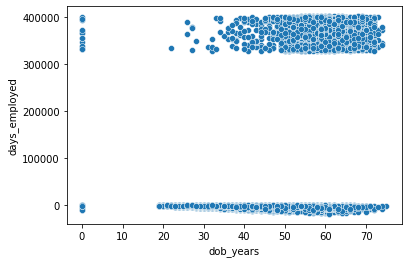

In [77]:
sns.scatterplot(data=df, x="dob_years", y="days_employed") 
# благодарю коллегу Павла Бундова, который подсказал https://yandex-students.slack.com/archives/C03BH2VL4JG/p1652101325818049?thread_ts=1651474839.835869&cid=C03BH2VL4JG этот способ проверки данных

Отсюда видно, что в группе есть 2 аномалии (помимо пропусков):
* часть значений - отрицательные. Но они хотя бы выглядят правдоподобно - трудовой стаж здесь складывается в десятки лет. Если так, то здесь будет достаточно изменить знак на противоположный
* одна часть значений - в десятки раз больше, чем другая. Возможно, здесь посчитали вместо дней в часах. Если так, то попробуем значения для этой части выборки разделить на 24, чтобы часы перевести в дни. 

Для начала изменить отрицательные значения на положительные. 

In [78]:
df['days_employed'] = df['days_employed'].abs()

И посмотрим, изменились ли значения:

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

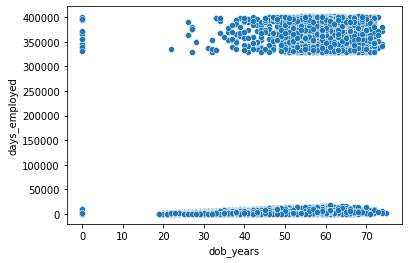

In [79]:
sns.scatterplot(data=df, x="dob_years", y="days_employed") 

Значения изменились. 

Теперь разделим "большие" значения (визуально - больше 300 000) на 24.
Напишем функцию, которую потом можно было бы применить к столбцу:

In [80]:
def correct_days_employed(days):
    """
    Возвращает изменённое значение по правилам:
    Тип 1 - входное значение нужно разделить на 275,
    Тип 2 - заменить на медиану,
    Тип 3 - изменить знак.
    """
    
    if days > 300_000:
        return days / 275
    return (days)

In [81]:
df['days_employed_corrected'] = df['days_employed'].apply(correct_days_employed)

<AxesSubplot:xlabel='dob_years', ylabel='days_employed_corrected'>

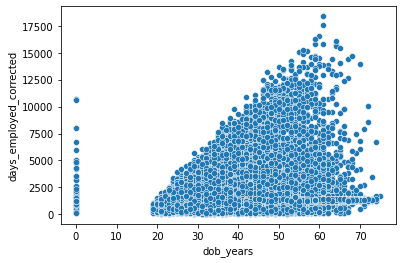

In [82]:
sns.scatterplot(data=df, x="dob_years", y="days_employed_corrected") 

Так больше похоже на правду. Теперь можно заполнить пропуски.

Ещё раз проверим, что пропуски у нас по прежнему на месте:

In [83]:
display(pd.DataFrame(round((
    df.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
days_employed,10.10
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00


**Теперь вопрос - как можно заполнить пропуски?**

Очевидный ответ - заполнить их медианным значением. Но это будет некорректно, т.к. медианное значение применится _ко всем_ людям, а это не вполне корректно, т.к. возрастные люди будут иметь тот же стаж, что и молодые, которые только начали работать.

Поэтому правильнее заполнять пропуски с учётом возраста. Как это можно сделать?

**Вариант 1. По формуле.**

По графику видно, что зависимость стажа от возраста - линейная. А по крайним точкам можно грубо прикинуть, что:
- работать начинают самое раннее в 13...15 лет,
- кредиты начинаю давать в 18 лет, поэтому эти люди не отражены в статистике,
- максимальный стаж в 18 лет - ок. 1000 дней,
- максимальный стаж для 50 лет - ок 12500 дней.

Тогда зависимость максимального стажа от возраста будет:

`СТАЖ = a * возраст + b`

Максимальный стаж для 18 лет -  1 000 часов
Максимальный стаж для 50 лет - 12 500 часов

Решив систему уравнений, получим, что 
`МАКС_СТАЖ = 360 * возраст - 5480`

При этом нужно понимать, что медианное значение будет меньше максимального. Но насколько - это гадание. Поэтому вариант не очень хороший. 

**Вариант 2. Медианой по возрастной группе.**

Для этого напишем функцию, которая разобъёт всех по возрастным подкатегориям.

In [84]:
def age_cat(age):
    """
    Возвращает возрастную группу по значению возраста age, используя правила:
    - '19-25',
    - '25-30',
    - '30-40',
    - '40-50',
    - '50-60',
    - '60-70',
    - '70-80'
    """
    
    if 19 <= age < 25:
        return '19-25'
    if 25 <= age < 30:
        return '25-30'
    if 30 <= age < 40:
        return '30-40'
    if 40 <= age < 50:
        return '40-50'
    if 50 <= age < 60:
        return '50-60'
    if 60 <= age < 70:
        return '60-70'
    if 70 <= age < 80:
        return '70-80'
    return 'возрастная группа кривая!'
    

In [85]:
df['age_category'] = df['dob_years'].apply(age_cat)
df['age_category'].value_counts()

30-40                        5674
40-50                        5371
50-60                        4679
60-70                        2346
25-30                        2306
19-25                         877
70-80                         171
возрастная группа кривая!     101
Name: age_category, dtype: int64

Видим, что одна возрастная группа кривая. Обработаем её позже. 

Теперь посчитаем медианное значение для каждой группы:

In [86]:
display(df.groupby('age_category')['days_employed_corrected'].median())

age_category
19-25                         744.542130
25-30                        1133.394429
30-40                        1579.887451
40-50                        1943.965054
50-60                        1399.423605
60-70                        1343.673680
70-80                        1344.496098
возрастная группа кривая!    1371.207222
Name: days_employed_corrected, dtype: float64

<a id="101"></a>

101 человек имеет аномалии в возрасте. Исправим это.

In [87]:
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Посмотрим, как распределены пропуски по семейному статусу:

In [88]:
df.loc[df['dob_years'] == 0][:]['family_status'].value_counts()

женат / замужем          49
гражданский брак         21
Не женат / не замужем    16
в разводе                10
вдовец / вдова            5
Name: family_status, dtype: int64

Аналогично посмотрим, как распеределеным пропуски по источнику дохода:

In [89]:
df.loc[df['dob_years'] == 0][:]['income_type'].value_counts()

сотрудник      55
компаньон      20
пенсионер      20
госслужащий     6
Name: income_type, dtype: int64

Вычислим медиану по возрасту в разных группах по семейному положению и источнику дохода:

In [90]:
df.groupby('family_status')['dob_years'].median()

family_status
Не женат / не замужем    36
в разводе                46
вдовец / вдова           58
гражданский брак         41
женат / замужем          43
Name: dob_years, dtype: int64

In [91]:
df.groupby('income_type')['dob_years'].median()

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

Более точную разбивку позволит сделать медиана по типу дохода.

Напишем функцию, которая заменит пропуски на медианные значения в своей группе по типу дохода:

In [92]:
def dob_years_fill(row):
    if int(row['dob_years']) == 0:
        if row['income_type'] == 'сотрудник':
            return 39
        elif row['income_type'] == 'пенсионер':
            return 60
        elif row['income_type'] == 'компаньон':
            return 39
        elif row['income_type'] == 'госслужащий':
            return 40
    return row['dob_years']

Применим функцию к датафрейму:

In [93]:
df['dob_years'] = df.apply(dob_years_fill, axis=1)

Проверим, ушли ли некорректные значения значения.

In [94]:
df['dob_years'] = df['dob_years'].replace(0, 35) 
df['dob_years'].value_counts()

39    648
35    617
40    615
41    607
34    603
38    598
42    597
33    581
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    397
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Некорректные данные ушли.

Заодно посмотрим, как выглядит распределение возраст х стаж:

<AxesSubplot:xlabel='dob_years', ylabel='days_employed_corrected'>

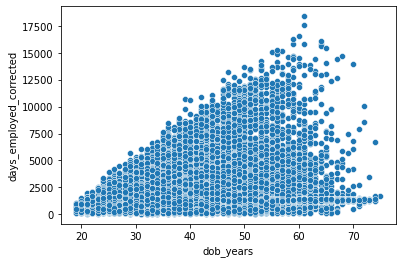

In [95]:
sns.scatterplot(data=df, x="dob_years", y="days_employed_corrected") 

Выглядит правдоподобно.

Ещё раз формируем категории по возрасту:

In [96]:
df['age_category'] = df['dob_years'].apply(age_cat)
df.groupby('age_category')['age_category'].value_counts()

age_category  age_category
19-25         19-25            877
25-30         25-30           2306
30-40         30-40           5749
40-50         40-50           5377
50-60         50-60           4679
60-70         60-70           2366
70-80         70-80            171
Name: age_category, dtype: int64

Пересчитаем меданные значения для каждой группы:

In [97]:
display(df.groupby('age_category')['days_employed_corrected'].median())

age_category
19-25     744.542130
25-30    1133.394429
30-40    1576.404199
40-50    1945.346143
50-60    1399.423605
60-70    1343.161647
70-80    1344.496098
Name: days_employed_corrected, dtype: float64

Отметим, что медианное значение стажа достаточно маленькое для возрастных людей, при том, что у многих из них есть только начальное образование. 
Крестьяне?

Т.к. тут не понятно, как заменить NaN на медианные значения стандартными средствами pandas (`fillna()` не подходит), то напишем функцию, которая это делает.

In [98]:
def days_employed_fillna(row):
    if np.isnan(row['days_employed_corrected']):
        if row['age_category'] == '19-25':
            return 744
        elif row['age_category'] == '25-30':
            return 1133
        elif row['age_category'] == '30-40':
            return 1576
        elif row['age_category'] == '40-50':
            return 1945
        elif row['age_category'] == '50-60':
            return 1399
        elif row['age_category'] == '60-70':
            return 1343
        elif row['age_category'] == '70-80':
            return 1344
    else:
        return row['days_employed_corrected']

Применим эту функцию к датафрейму и получим обновлённый стобец `days_employed_corrected`:

In [99]:
df['days_employed_corrected'] = df.apply(days_employed_fillna, axis=1)

In [100]:
display(pd.DataFrame(round((
    df.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
days_employed,10.10
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00


Ок, пропусков в `days_employed_corrected` не осталось.

Столбец `days_employed` удалим.

In [101]:
df = df.drop('days_employed', 1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   children                 21525 non-null  int64  
 1   dob_years                21525 non-null  int64  
 2   education                21525 non-null  object 
 3   education_id             21525 non-null  int64  
 4   family_status            21525 non-null  object 
 5   family_status_id         21525 non-null  int64  
 6   gender                   21525 non-null  object 
 7   income_type              21525 non-null  object 
 8   debt                     21525 non-null  int64  
 9   total_income             19351 non-null  float64
 10  purpose                  21525 non-null  object 
 11  days_employed_corrected  21525 non-null  float64
 12  age_category             21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


#### Заполняем пропуски  столбца`total_income`

Заполним пропуски медианными значениями в зависимости от `income_type`. 
Для этого посчитаем медианы `total_income` в зависимости от `income_type`.

In [103]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [104]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Напишем функцию, которая будет заполнять NaN в `total_income` в зависимости от `income_type`.

In [105]:
def total_incom_fillna(row):
    if np.isnan(row['total_income']):
        if row['income_type'] == 'госслужащий':
            return 150447.935283
        elif row['income_type'] == 'пенсионер':
            return 118514.486412
        elif row['income_type'] == 'компаньон':
            return 172357.950966
        elif row['income_type'] == 'сотрудник':
            return 142594.396847
        elif row['income_type'] == 'предприниматель':
            return 499163.144947
        elif row['income_type'] == 'безработный':
            return 131339.751676
    else:
        return row['total_income']

Применим её:

In [106]:
df['total_income'] = df.apply(total_incom_fillna, axis=1)

In [107]:
display(pd.DataFrame(round((
    df.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00
total_income,0.00


Ок, пропусков в `total_income` не осталось. Идём дальше

### Шаг 2.2 Проверка данных на аномалии и исправления.

 <a id="step_2_2"></a>

[К оглавлению.](#back)

Чтобы определть, как именно нужно заполнять прпуски, посмотрим, как именно заполнены столбцы в датафреймах 
* полном 
* и том, который содержит только пропущенные значения.

Для начала проверим, какие данные вообще встречаются во всех колонках:

для начала - количество детей:

#### Обрабатываем столбец `children`.

In [108]:
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]


Ага, -1 и 20 - явные аномалии. Посмотрим, сколько таких строчек?

In [109]:
print(df.groupby('children')['children'].count())

anomal_ = df[(df['children'] == -1) | (df['children'] == 20)]['children'].count()

print(anomal_)

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64
123


Посчитаем, какая доля в выборке подобных строк. Для этого разделим получившееся количество на количество элементов в датасете.

In [110]:
print('{:.01%}'.format(anomal_ / len(df['children'])))

0.6%


То есть количество таких значений - статистически невелико - менее 1 процента. Можно сбросить эти строчки, а можно также как и другие количественные значения заполить их медианными. Сделаем это.

Для этого посчитаем медиану во всей таблице, за исключением этих строк:

In [111]:
children_medeian = df['children'].median()
print(children_medeian)

0.0


То есть в данном случае получается, что можно аномальные значения -1 и 20 заполнить нулями. B проверим, как будет выглядеть распределение.

In [112]:
df['children'] = df['children'].replace(20, 0)
df['children'] = df['children'].replace(-1,0)
print(df.groupby('children')['children'].count())

children
0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


#### Обрабатываем столбец `days_employed`. 

Фактически мы уже убрали из него аномалии, когда [заполнял пропуски в этом столбце](#days_employed_fillna).

In [113]:
#df.groupby('days_employed_corrected')['days_employed_corrected'].count()
df['days_employed_corrected'].value_counts()

1576.000000    572
1945.000000    537
1399.000000    501
1343.000000    254
1133.000000    201
              ... 
2585.402858      1
1320.841444      1
1394.302246      1
168.308837       1
1636.419775      1
Name: days_employed_corrected, Length: 19358, dtype: int64

Проверяем теперь здесь, какое распределение:

In [114]:
df['days_employed_corrected'].describe([.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.9, 0.95, 0.99])

count    21525.000000
mean      2104.667454
std       2027.493334
min         24.141633
1%         116.193809
5%         241.796442
10%        421.660327
25%       1011.267704
50%       1399.000000
75%       2518.168900
80%       2988.750615
81%       3102.503816
82%       3209.913270
83%       3317.714603
84%       3442.548019
85%       3595.837645
90%       4523.916336
95%       6245.244696
99%      10461.423465
max      18388.949901
Name: days_employed_corrected, dtype: float64

Итого. Данные получились правдоподобные, хотя, т.к. они были получены с серьёзными допущениями, они скорее всего будут бесполезными.

Кончено, можно их сверить со столбцом возраста, например, и придумать формулу более хитрую, но всё равно это будет существенное допущение. Поэтому без того, чтобы поставщик данных этот столбец данных уточнил - тратить на него больше времени бессмысленно.

#### Обрабатываем столбец `debt`. 


Проверим следующий столбец `debt` - имел ли задолженность по возврату кредитов? 

In [115]:
print(df['debt'].unique())

[0 1]


Тут вроде бы всё ок. 
Хотя было бы интересно посмотреть, какое распределение - сколько людей имело просрочки?

In [116]:
df.groupby('debt')['debt'].count()

debt
0    19784
1     1741
Name: debt, dtype: int64

Аномалий не видно. 

#### Обрабатываем столбец `dob_years`. 

После обработки [здесь](#101) некорректные данные ушли:

In [117]:
df['dob_years'].value_counts()

39    648
35    617
40    615
41    607
34    603
38    598
42    597
33    581
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    397
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

#### Обрабатываем столбец `education`. 

In [118]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Тут есть дубли, их нужно будет убрать на шаге 2.4.

Берём следующий столбик.

In [119]:
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Не до конца понятно, что это может значить ID, но циферки выглядят правдоподобно.

Возможно, 0 - это начальное образование, 1 - среднее и т.д. Чтобы это установить, нужно будет проверить соответствие id и групп образования, но сделать это нужно будет после удаления дубликатов.

Исследуем следующий столбец:

#### Обрабатываем столбец `family_status`.

In [120]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Тут вроде бы всё нормально, дублей нет, аномалий - тоже нет.

#### Обрабатываем столбец `gender`.

In [121]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

XNA - не до конца понятно, нужно будет проверить, что это. Ради интереса - выведем эту строку:

In [122]:
df.loc[df['gender'] == 'XNA']

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_corrected,age_category
10701,0,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости,2358.600502,19-25


Не понятно, насколько тут являются уникальными значения столбца "компаньон". Если он малочисленен, то можно будет убить возможность увидеть какую-то важную закономерность. Проверим, сколько компаньонов в выборке:


In [123]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

Компаньонов много, а значит усреднение (точнее, приведение к медиане) одного - выборку не повредит. Сделаем это.

In [124]:
df['gender'] = df['gender'].replace('XNA', 'F')

df.groupby('gender')['gender'].count()

gender
F    14237
M     7288
Name: gender, dtype: int64

Ок, ни в гендере, ни в income_type, дублей нет, аномальных значений - тоже нет. 

#### Обрабатываем столбец `purpose`.

In [125]:
print(df['purpose'].unique())

df.groupby('purpose')['purpose'].count()

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


purpose
автомобили                                478
автомобиль                                495
высшее образование                        453
дополнительное образование                462
жилье                                     647
заняться высшим образованием              496
заняться образованием                     412
на покупку автомобиля                     472
на покупку подержанного автомобиля        479
на покупку своего автомобиля              505
на проведение свадьбы                     777
недвижимость                              634
образование                               447
операции с жильем                         653
операции с коммерческой недвижимостью     651
операции с недвижимостью                  676
операции со своей недвижимостью           630
покупка жилой недвижимости                607
покупка жилья                             647
покупка жилья для сдачи                   653
покупка жилья для семьи                   641
покупка коммерческой недви

Тут много разных значений, которые обозначают примерно одно и то же - эти неявные дубли нужно будет убрать на шаге 2.4.  Но аномальных значений нет, поэтому разбираем следующий столбик.

In [126]:
print(df['total_income'].unique())
print(df['total_income'].nunique())
print(max(df['total_income'].unique()))
print(min(df['total_income'].unique()))

[253875.6394526  112080.01410244 145885.95229686 ...  89672.56115303
 244093.05050043  82047.41889948]
19356
2265604.028722744
20667.26379327158


Тут много разных значений - от 20 тыр / мес, до 2 млн / мес. Но выглядят они правдоподобно. Ок.

### Шаг 2.3. Изменение типов данных.

 <a id="step_2_3"></a>

[К оглавлению.](#back)

Ещё раз посмотрим, данные каких типов есть в датасете:

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   children                 21525 non-null  int64  
 1   dob_years                21525 non-null  int64  
 2   education                21525 non-null  object 
 3   education_id             21525 non-null  int64  
 4   family_status            21525 non-null  object 
 5   family_status_id         21525 non-null  int64  
 6   gender                   21525 non-null  object 
 7   income_type              21525 non-null  object 
 8   debt                     21525 non-null  int64  
 9   total_income             21525 non-null  float64
 10  purpose                  21525 non-null  object 
 11  days_employed_corrected  21525 non-null  float64
 12  age_category             21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Явно избыточными с точки зрения хранения данных выглядя столбцы `days_employed` и `total_income`. Для них должно быть достаточно типа int. Но т.к. в задании было указано изменить только total_income, то будем работать с ним: 

In [128]:
df = df.astype({'total_income': 'int'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   children                 21525 non-null  int64  
 1   dob_years                21525 non-null  int64  
 2   education                21525 non-null  object 
 3   education_id             21525 non-null  int64  
 4   family_status            21525 non-null  object 
 5   family_status_id         21525 non-null  int64  
 6   gender                   21525 non-null  object 
 7   income_type              21525 non-null  object 
 8   debt                     21525 non-null  int64  
 9   total_income             21525 non-null  int64  
 10  purpose                  21525 non-null  object 
 11  days_employed_corrected  21525 non-null  float64
 12  age_category             21525 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


Проверим, что в изменённом столбце не "поехали цифры".

In [129]:
df

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_corrected,age_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,40-50
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,30-40
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,30-40
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,30-40
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,1237.331171,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,40-50
21521,0,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,1250.681470,60-70
21522,1,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,30-40
21523,3,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,30-40


Проверил - значения в последней строке №21524 совпадают до целого числа.

### Шаг 2.4. Удаление дубликатов.

 <a id="step_2_4"></a>

[К оглавлению.](#back)

Проверим для начала явные дубликаты:


In [130]:
df.duplicated().sum()

54

Удалим эти дубликаты:

In [131]:
df = df.drop_duplicates().reset_index(drop = True)

df.duplicated().sum()

0

Отлично, явных дубликатов не осталось. Но есть ещё неявныек, которые мы выявили на шаге 2.2 для столбцов:
* `education` 
* `purpose`

Начнём с первого - с `education` 

Для этого напомним, как выглядят категории:



In [132]:
print(df['education'].unique())

df.groupby('education')['education'].count()

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


education
ВЫСШЕЕ                   273
Высшее                   268
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Начальное                 15
Неоконченное высшее       47
СРЕДНЕЕ                  772
Среднее                  711
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
высшее                  4710
начальное                250
неоконченное высшее      668
среднее                13705
ученая степень             4
Name: education, dtype: int64

Отсюда видно, что значительное количество позиций отличаются только регистром.

Чтобы убрать лишее - приведём их к одному регистру:

In [133]:
df['education'] = df['education'].str.lower()

И проверим, что количество категорий у нас уменьшилось:

In [134]:
df.groupby('education')['education'].count()

education
высшее                  5251
начальное                282
неоконченное высшее      744
среднее                15188
ученая степень             6
Name: education, dtype: int64

Теперь ещё раз проверим - не появилось ли дубликатов явных?

In [135]:
df.duplicated().sum()

17

Ага, их появилось ещё 17 штук. Удалим их.

In [136]:
df = df.drop_duplicates().reset_index(drop = True)

df.duplicated().sum()

0

#### Пояснение - как я искал дубликаты?

Это видно выше из логики, но повторю ключевые значения здесь:
1) удаление явных дубликатов - это делается командой drop_duplicates
2) после этого нужно искать неявные дубликаты, которые могут появляться из-за:
* разного регистра записей в некоторых столбиках. Здесь метод - привести к одному регистру и после этого ещё раз удалить явные дубликаты.
* вероятно, из-за корявого округления в числовых столбцах. Здесь метод - изменить тип данных стобца с float на int и после этого ещё раз удалить явные дубликаты.

#### Возможные причины появления дубликатов:

* объединение нескольких таблиц, значения которые были случайно задублированы в процессе их обработки,
* человеческий фактор - данные занести руками в разном регистре.
* при считывании данных неверно определился тип числовых переменных, из-за этого по разному происходило округление, и как следствие дубликат получился неявным.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

 <a id="step_2_5"></a>

[К оглавлению.](#back)

Ё!!!!Ё Дописать здесь, что и зачем я делаю.

Можно создать датафрейм вручную, но можно это и автоматизировать через создание новых датафреймов:

In [137]:
df_edu = df.loc[:, ['education_id', 'education']]
# print(df_edu.duplicated().sum())
df_edu = df_edu.drop_duplicates().reset_index(drop = True)
# bprint(df_edu.duplicated().sum())
df_edu

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Аналогичную операцию проделаем и для `family_id`:

In [138]:
df_fam = df.loc[:, ['family_status_id', 'family_status']]
# print(df_fam.duplicated().sum())
df_fam = df_fam.drop_duplicates().reset_index(drop = True)
# print(df_fam.duplicated().sum())
df_fam

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Удаляем столбцы `education` и `family_status`:

In [139]:
#df.info()
df = df.drop(['education', 'family_status'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   children                 21454 non-null  int64  
 1   dob_years                21454 non-null  int64  
 2   education_id             21454 non-null  int64  
 3   family_status_id         21454 non-null  int64  
 4   gender                   21454 non-null  object 
 5   income_type              21454 non-null  object 
 6   debt                     21454 non-null  int64  
 7   total_income             21454 non-null  int64  
 8   purpose                  21454 non-null  object 
 9   days_employed_corrected  21454 non-null  float64
 10  age_category             21454 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 1.8+ MB


### Шаг 2.6. Категоризация дохода.

 <a id="step_2_6"></a>

[К оглавлению.](#back)

Есть гипотеза, что доход влияет на возвращаемость кредита. Но напрямую сделать это сложно, т.к. доход - это численное значение, и он варьируется в диапазоне от 20 тыр до 2 млн р, а уникальных значений в 20 тыс выборке - более 19 тыс значений.

Знаичт нужно перейти от численной к категориальным переменным.

Категоризовать будем по следующим грейдам:
```
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.
```

Делать это будем через функцию, которую потом можно будет удобно использовать в pandas.

In [76]:
def income_cat(income):
    """
    Возвращает категорию группу по значению возраста age, используя правила:
    0–30000 — 'E';
    30001–50000 — 'D';
    50001–200000 — 'C';
    200001–1000000 — 'B';
    1000001 и выше — 'A'.
    """
    
    if 0 <= income <= 30000:
        return 'E'
    if 30000 < income <= 50000:
        return 'D'
    if 50000 < income <= 200000:
        return 'C'
    if 200000 < income <= 1000000:
        return 'B'
    if 1000000 < income:
        return 'A'

#print(income_cat(200001)) # здесь убедились, что функция работает

Добавим столбец, в котором запишем категорию дохода, получаемую функцией `income_cat`.

In [77]:
df['income_category'] = df['total_income'].apply(income_cat)

### Шаг 2.7. Категоризация целей кредита.

 <a id="step_2_7"></a>

[К оглавлению.](#back)

Аналогично создадим категорию для целей кредита - `purpose_category`.

Для этого сначала посмотрим, какие значения вообще встречаются в столбце `purpose`.

In [78]:
print(df['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Напишем функцию, которая бы разбирала эти категории по новым, более понятным и удобным для анализа категориям:
```
'операции с автомобилем',
'операции с недвижимостью',
'проведение свадьбы',
'получение образования'.
```

In [80]:
def purpose_cat(purpose):
  '''
  в каждом из листов собрал занчения в столбце `purpose`:
  auto_     ⇒ 'операции с автомобилем',
  property_ ⇒ 'операции с недвижимостью',
  marriage_ ⇒ 'проведение свадьбы',
  education_ ⇒'получение образования'
  '''
  
# собственно, сама функция:
  if 'автомобил' in purpose:
    return 'операции с автомобилем'
  if ('жиль' in purpose) or ('недвижимост' in purpose):
    return 'операции с недвижимостью'
  if 'свадьб' in purpose:
    return 'проведение свадьбы'
  if 'образовани' in purpose:
    return 'получение образования'
  return 'Ошибка категоризации!'


Проверим, как сработала функция:

In [81]:
df['purpose_category'] = df['purpose'].apply(purpose_cat)

df

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_corrected,age_category,income_category,purpose_category
0,1,42,0,0,F,сотрудник,0,253875,покупка жилья,8437.673028,40-50,B,операции с недвижимостью
1,1,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,30-40,C,операции с автомобилем
2,0,33,1,0,M,сотрудник,0,145885,покупка жилья,5623.422610,30-40,C,операции с недвижимостью
3,3,32,1,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,30-40,B,получение образования
4,0,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,1237.331171,50-60,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,43,1,1,F,компаньон,0,224791,операции с жильем,4529.316663,40-50,B,операции с недвижимостью
21450,0,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,1250.681470,60-70,C,операции с автомобилем
21451,1,38,1,1,M,сотрудник,1,89672,недвижимость,2113.346888,30-40,C,операции с недвижимостью
21452,3,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,30-40,B,операции с автомобилем


Теперь посмотрим, сколько элементов (человек) в каждой категории.

In [82]:
df.groupby('purpose_category')['purpose_category'].count().sort_values(ascending=False)

purpose_category
операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

## Шаг 3. Ответы на вопросы.

 <a id="step_3_1"></a>

[К оглавлению.](#back)

Чтобы сделать полезные выводы, нужно понять, какие столбца могуть быть полезны для нас?

Из тех, которые есть в датасете - это показатель `debt`, то есть были ли у него просрочки по кредиту?

Именно по этому показателю можно попытаться вывести закономерность (корреляцию), какие параметры потенциального заёмщика связаны в риском невозврата кредита в срок. 

Поэтому проверим, как на этот показатель влияют параметры:
в первую очередь:
* количество детей `children`
* семейное положение `family_status`
* категорией дохода `income_category`
* целью кредита `purpose_category`

Также опционально можно проверить аналогичные закономерности для оставшихся параметров:
* `days_employed`	
* `dob_years`	
* `education	education_id`		
* `gender`	
* `income_type`	
* `debt`	
* `total_income	`
* `purpose`

Найдём закономерности для первых четырёх параметров.



Для этого определим, какое количество людей, имеющих просрочки, есть в каждой группе. Для этого посчитаем отношение тех, кто имеет просрочки в группе к общему количеству людей в группе.

### Вопрос 1 - Есть ли зависимость между количеством детей и возвратом кредита в срок?


In [83]:
# df.groupby('debt')['debt', 'children'].count()

df.groupby('children')['debt'].sum() / df.groupby('children')['debt'].count()

children
0    0.075419
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

Посмотрим на репрезентативность выборки:

In [84]:
df.groupby('children')['children'].count()

children
0    14214
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [85]:
def mk_pivot(param_to_check):
    print(df.pivot_table(index=param_to_check,
                         values = 'debt', 
                         aggfunc=['count', 'sum', 'mean']
                        )
         )

In [86]:
mk_pivot('children')

          count   sum      mean
           debt  debt      debt
children                       
0         14214  1072  0.075419
1          4808   444  0.092346
2          2052   194  0.094542
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000


##### Вывод 1:

Таким образом видно, что 
* статистически можноделать выводы только для тех, кто имеет от 0 до 3 детей включительно.
* риск просрочки чуть выше у тех, у кого 1 или 2 ребёнка (от 9,2 до 9,7%), 
* Пониженный риск у тех, у кого 3 ребёнка (8,2%),
* наилучшие показатели для тех, у кого детей нет совсем - 7.5%.

### Вопрос 2 - Есть ли зависимость между семейным положением и возвратом кредита в срок?



In [87]:
mk_pivot('family_status_id')

                  count  sum      mean
                   debt debt      debt
family_status_id                      
0                 12339  931  0.075452
1                  4151  388  0.093471
2                   959   63  0.065693
3                  1195   85  0.071130
4                  2810  274  0.097509


Напомним, какие статусы скрываются за ID:

In [88]:
df_fam

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


##### Вывод 2:

Самые отвесттвенные плательщики - вдовые (6.5%) и разведённые (7.1%).
Самые безотвественные - неженатые / незамужние (9,7%) и те, кто живёт в гражданском браке (9.3%).

### Вопрос 3 - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [89]:
mk_pivot('income_category')

                 count   sum      mean
                  debt  debt      debt
income_category                       
A                   25     2  0.080000
B                 5042   356  0.070607
C                16015  1360  0.084920
D                  350    21  0.060000
E                   22     2  0.090909


##### Вывод 3:

Статистически можно учитывать только группы B, С и D.
Самые ответсвенные - люди с высоким доходом (6%) и низким (7%).

### Вопрос 4 - Как разные цели кредита влияют на его возврат в срок?

In [90]:
mk_pivot('purpose_category')

                          count  sum      mean
                           debt debt      debt
purpose_category                              
операции с автомобилем     4306  403  0.093590
операции с недвижимостью  10811  782  0.072334
получение образования      4013  370  0.092200
проведение свадьбы         2324  186  0.080034


##### Вывод 4:

самые безопасные плательщики - те, кто тратит на недвижимость (7.2%) и свадьбы (8.0%),
покупка машины и образование - имеют высокий риск невозврата (9.4, 9.2%). 

### Ответы на дополнительные вопросы о зависимости возврата кредита в срок от параметра ...

#### Какая доля неплательщико по всей выборке?

* `debt`


In [91]:
df.groupby('debt')['debt'].count()

debt
0    19713
1     1741
Name: debt, dtype: int64

То есть общая доля просрочек по всей выборке = 

In [92]:
print("{0:.2%}".format(1741 / 19712))

8.83%


Значит, нужно будет смотреть, какие категории имеют повышенный риск невозврата относительно этой цифры.

Проверим аналогичные закономерности для других параметров.

### Вопрос 5 - ... и общий трудовой стаж?

* `days_employed`
Эта колонка сильно восстановленная, поэтому не может являться надёжным показателем. Тем не менее, just for fun и для тренировки посмотрим, какие здесь есть закономерности. 

Для начала нужно разбить этот диапазон на части в зависимости от трудового стажа:

In [93]:
df['days_employed_shares'] = pd.qcut(df['days_employed_corrected'], q=8)
df['days_employed_shares'].value_counts()

(1284.467, 1399.0]      2699
(24.141, 512.359]       2682
(512.359, 1008.951]     2682
(2523.811, 4022.59]     2682
(4022.59, 18388.95]     2682
(1008.951, 1284.467]    2681
(1749.13, 2523.811]     2681
(1399.0, 1749.13]       2665
Name: days_employed_shares, dtype: int64

In [94]:
mk_pivot('days_employed_shares')

                     count  sum      mean
                      debt debt      debt
days_employed_shares                     
(24.141, 512.359]     2682  304  0.113348
(512.359, 1008.951]   2682  287  0.107010
(1008.951, 1284.467]  2681  208  0.077583
(1284.467, 1399.0]    2699  168  0.062245
(1399.0, 1749.13]     2665  213  0.079925
(1749.13, 2523.811]   2681  228  0.085043
(2523.811, 4022.59]   2682  195  0.072707
(4022.59, 18388.95]   2682  138  0.051454


##### Вывод 5:

Если достроили данные верно, то получается, что:
- самые расковые - с минимальным стажем - от 24 до 1008 дней.
- самые безопасные - с самым большим стажем - от 4000 дней стажа.
- остальные - зависимость нелинейная, см. результаты выше.

### Вопрос 6 - ... и возраст?

* `dob_years`

Тут явно нужно категоризовать, т.к. по каждому году явно делать выводы неправильно. 

In [95]:
df.groupby('age_category')['debt'].sum() / df.groupby('age_category')['debt'].count()

age_category
19-25    0.100571
25-30    0.113232
30-40    0.097438
40-50    0.075373
50-60    0.065493
60-70    0.050191
70-80    0.035503
Name: debt, dtype: float64

Пересчитаем это другим способом:

In [96]:
df['age_shares'] = pd.qcut(df['dob_years'], q=15)
mk_pivot('age_shares')

               count  sum      mean
                debt debt      debt
age_shares                         
(18.999, 26.0]  1640  178  0.108537
(26.0, 29.0]    1540  171  0.111039
(29.0, 32.0]    1605  182  0.113396
(32.0, 34.0]    1182  120  0.101523
(34.0, 37.0]    1706  142  0.083236
(37.0, 39.0]    1244  115  0.092444
(39.0, 41.0]    1218   97  0.079639
(41.0, 44.0]    1653  127  0.076830
(44.0, 47.0]    1445  115  0.079585
(47.0, 50.0]    1557  112  0.071933
(50.0, 53.0]    1389   87  0.062635
(53.0, 56.0]    1402   87  0.062054
(56.0, 59.0]    1353   84  0.062084
(59.0, 62.0]    1096   51  0.046533
(62.0, 75.0]    1424   73  0.051264


##### Вывод 6:
Вот тут интересные данные - разница в вероятности невозврата отличается в разы!
Молодые имеют просрочки по возврату долгов в 2 раза чаще, чем пенсионеры. Это статистически значимый вывод, который стоит зафиксировать

### Вопрос 7 - ... и уровнем образования?

* `education` и `education_id`

In [97]:
mk_pivot('education_id')

              count   sum      mean
               debt  debt      debt
education_id                       
0              5250   278  0.052952
1             15172  1364  0.089902
2               744    68  0.091398
3               282    31  0.109929
4                 6     0  0.000000


Напомним, какие здесь есть категории:

In [98]:
df_edu

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


##### Вывод 7.
В плане возраста выборка сильно смещена в сторону людей только со средним образованием. Реперезентативные группы - со средним и высшим образованием. 
Однозначно лучше давать деньги людям с высшим обрзованием, т.к. у них вероятность просрочки платежа в 1,8 раза ниже по сравнению с теми, у кого неоконченное высшее или среднее образование. 

### Вопрос 8 - ... и пол?

* `gender`


In [99]:
mk_pivot('gender')

        count  sum      mean
         debt debt      debt
gender                      
F       14175  994  0.070123
M        7279  747  0.102624


##### Вывод 8.

Женщины не возвращают долги почти в 1.5 раза реже, чем мужчины.

### Вопрос 9 - ... и источник дохода?

* `income_type`


In [100]:
mk_pivot('income_type')

                 count   sum      mean
                  debt  debt      debt
income_type                           
безработный          2     1  0.500000
в декрете            1     1  1.000000
госслужащий       1457    86  0.059025
компаньон         5078   376  0.074045
пенсионер         3829   216  0.056412
предприниматель      2     0  0.000000
сотрудник        11084  1061  0.095724
студент              1     0  0.000000


##### Вывод 9.

самые надёжные плательщики - пенсионеры и госслужащие, у них порядка 5% просрочек.
Наёмные работники имеют вероятность просрочки в 9,5%
Бизнесмены (компаньоны) имеют риск просрочки ниже среднего - 7,4%.

## Общий вывод:

 <a id="step_4"></a>

[К оглавлению.](#back)

Проведённый анализ позволяет посмтроить скоринговую модель для оценки вероятности просрочки платежа со стороны заёмщика.

Общая доля просрочек во всей выборке - **8.83%** Считать факторы, которые повышают риск будем относительно этой цифры. Большая часть характеристик укладывается  в диапазон от 8 до 9%. 

Ниже некоторые характерные группы, где видно, что риск сильно увеличивается или уменьшается.

**более 11%:**
* возраст от 26 до 32 лет
* (ненадёжный параметр) - малый трудовой стаж - до 512 дней

**более 10%:**
* возраст от 19 до 25 лет
* только начальное образование
* мужчина
* (ненадёжный параметр) - малый трудовой стаж - от 513 до 1008 дней

**более 9%:**
* неженатые или живущие гражданским браком
* с 1 или 2 детьми
* просят деньги на авто или образование
* возраст от 30 до 40
* неоконченное высшее образование
* наёмный работки (сотрудник)

Факторы, снижающие риски просрочки:
**ниже 8%**
* женщины
* опреции с недвижимостью 
* доход от 20 до 50 тыс р
* в разводе или женатые
* без детей

**ниже 7%**
* вдовые

**ниже 6%**
* госслужащие
* с высшим образованием
* возраст 60-70
* с доходом от 200 тыс р
* (ненадёжный параметр) - трудовой стаж от 4000 дней

Один из, вероятно наиболее информативных столбцов - "общий трудовой стаж" имеет существенные недостатки в данных, поэтому по нему оценка проведена на была.